## **Análise Exploratória dos Dados**

In [1]:
import os
os.chdir('..')

import pandas as pd
import numpy as np
from utilsforecast.preprocessing import fill_gaps
from utilsforecast.plotting import plot_series
from main.utils import ts_train_test_split
from main.plots import plot_time_series

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%load_ext autoreload
%autoreload 2

In [3]:
# leitura dos dados brutos
df = pd.read_csv(
    "nbs/data/data.csv",
    sep=';', 
    parse_dates=['ds'],
    dayfirst=True,
    dtype={'y': np.int32})

In [4]:
# preenchendo os dados com os dias ausentes
df = fill_gaps(
    df=df,
    freq='D',
    start='per_serie',
    end='per_serie'
).fillna(0)


In [5]:
# estatísticas descritivas
df.groupby("unique_id")['y'].describe()

,count,mean,std,min,25%,50%,75%,max
unique_id,,,,,,,,
SKU_01,1696.00,169.23,156.41,0.00,28.00,114.50,298.00,752.00
SKU_02,2088.00,271.55,205.25,0.00,66.00,265.00,431.00,1350.00
SKU_03,2087.00,61.27,48.56,0.00,15.00,53.00,102.00,242.00
SKU_04,2088.00,47.15,35.64,0.00,11.00,51.00,75.00,406.00
SKU_05,2087.00,399.31,359.03,0.00,67.50,357.00,605.00,1850.00
SKU_06,2087.00,40.24,35.62,0.00,8.00,37.00,61.00,381.00
SKU_07,2088.00,675.27,1118.08,0.00,127.75,590.00,1011.25,40252.00
SKU_08,2088.00,76.23,61.00,0.00,17.00,75.00,122.00,478.00
SKU_09,2087.00,79.84,70.98,0.00,13.00,81.00,116.00,1008.00


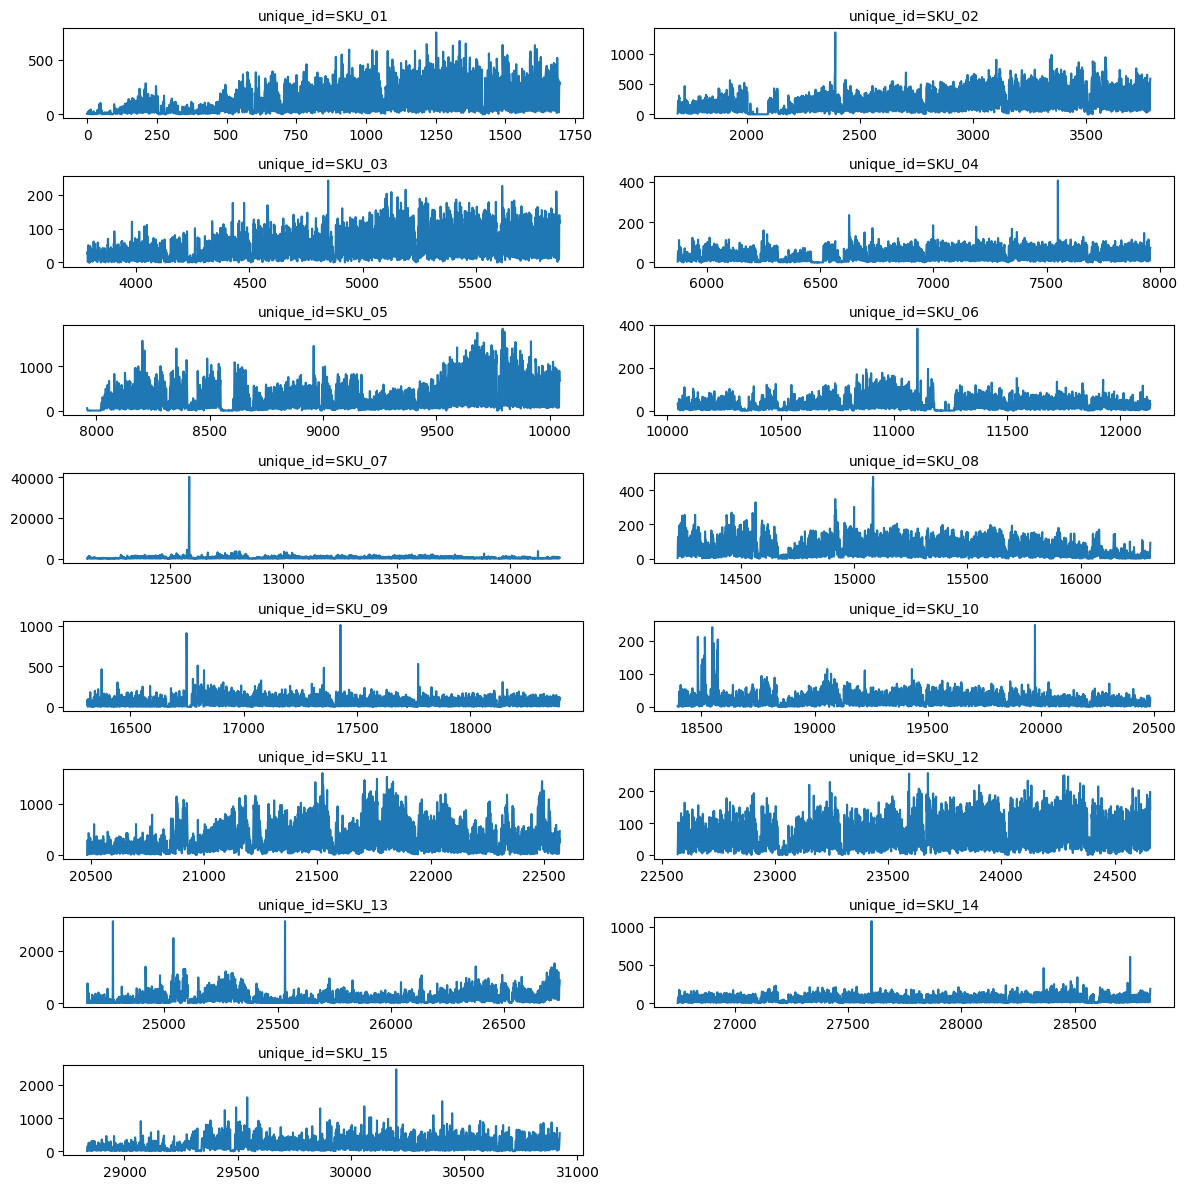

In [7]:
plot_time_series(
    df=df,
    data_cols=['y'],
    id_col='unique_id',
    ids=df.unique_id.unique(),
    grid=(8, 2),
    figsize=(12, 12)
)

In [8]:
# dividindo dados em treino e teste
train_df, test_df = ts_train_test_split(df=df, train_size=0.7, id_col='unique_id')

In [9]:
# salvando dados
train_df.to_csv("nbs/data/train_df.csv", index=False)
test_df.to_csv("nbs/data/test_df.csv", index=False)